In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
X_train = X_train/255
X_test = X_test/255

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:

from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# ****MLP(Hidden layers=2)****

### MLP+Relu+ADAM

In [12]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2253 - acc: 0.9328 - val_loss: 0.1231 - val_acc: 0.9625
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0817 - 

#### Testing with Test Data 

Test score: 0.11025334126794001
Test accuracy: 0.9785


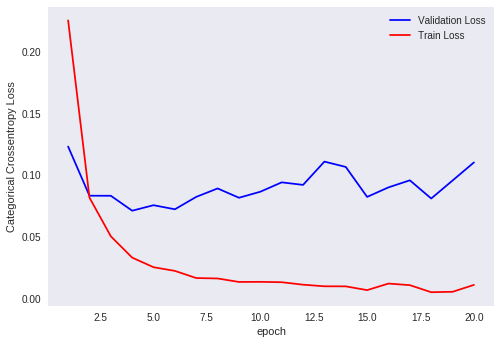

In [13]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##### Observations
    1. With, 2 hidden layers, the accuracy is good and is the least at 2 epochs.
    2. The accuracy is around 98%.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


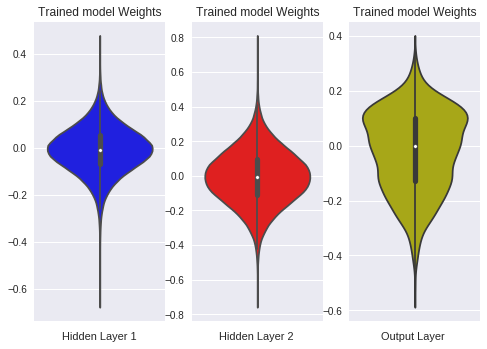

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 0.
    3. The weights of output layer deviate towards 0.1

### MLP+Relu+ADAM+BN

In [14]:
from keras.layers.normalization import BatchNormalization
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss

#### Testing with Test Data

Test score: 0.09431505840643459
Test accuracy: 0.9783


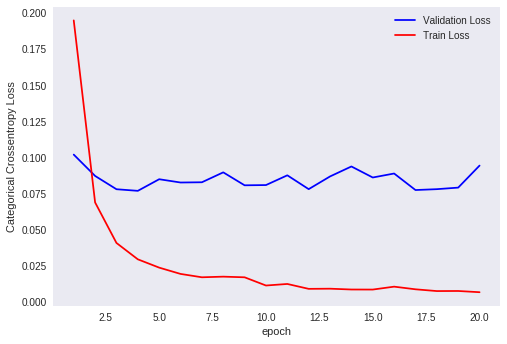

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##### Observations
    1. With, 2 hidden layers, the accuracy is good and is the least at 2 epochs.
    2. The accuracy is around 97.83%.
    3. We've used Batch Normalisation here.
    4. The loss also reduced with it.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


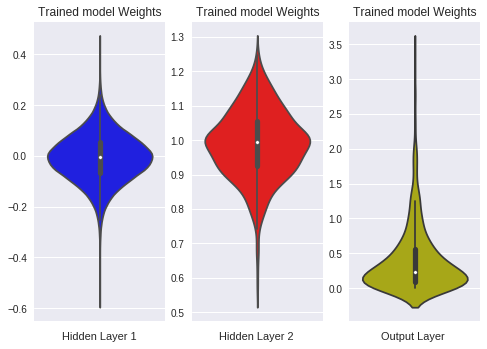

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 1.0.
    3. The weights of output layer deviate towards 0.1

### MLP+Relu+Adam+Dropout

In [0]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.

#### Testing with Test Data

Test score: 0.06366564605646745
Test accuracy: 0.9834


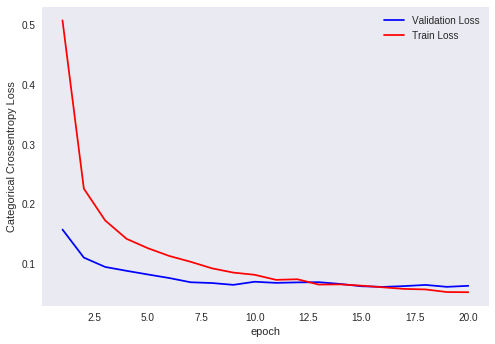

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##### Observations
    1. With, 2 hidden layers, the accuracy is good and is the least at 10 epochs.
    2. The accuracy is around 98.3%.
    3. We've used Dropout methos here.
    4. The loss also reduced with it.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


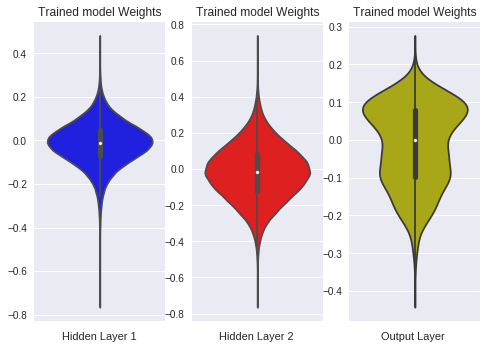

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 0.
    3. The weights of output layer eviate towards 0.1

### MLP+ReLU+Adam+Dropout+BN

In [0]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2570      
Total para

#### Testing with Test Data

Test score: 0.0551103844941099
Test accuracy: 0.9829


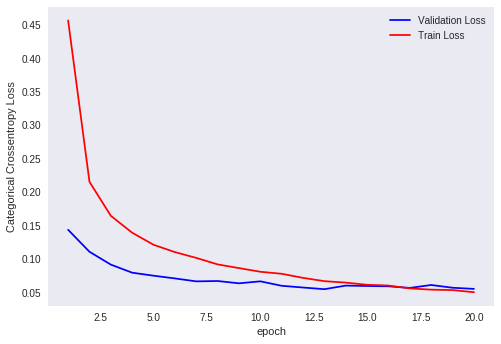

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##### Observations
    1. With, 2 hidden layers, the accuracy is good and is the least at 15 epochs.
    2. The accuracy is around 98.29%.
    3. We've used Batch Normalisation and added droppout feature here.
    4. The loss also reduced significantly with it.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


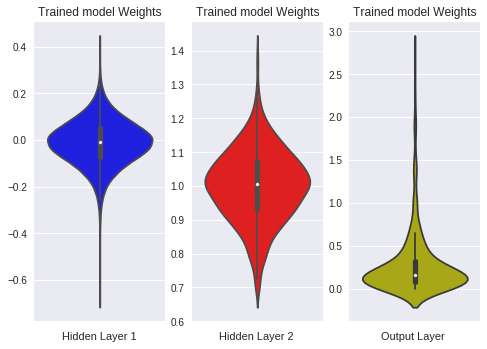

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 1.0.
    3. The weights of output layer deviate towards 0.1

In [0]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()

x.field_names = ["Model","Activation", "Number of layers","Optimizer", " Optimization Features", "Test score","Test accuracy"]

x.add_row(["MLP","ReLU",2,"AdAM","None",0.09,0.97])
x.add_row(["MLP","ReLU",2,"AdAM","BN",0.09,0.97])
x.add_row(["MLP","ReLU",2,"AdAM","Drop out",0.06,0.98])
x.add_row(["MLP","ReLU",2,"AdAM","BN & Dropout",0.05,0.98])


print(x)

+-------+------------+------------------+-----------+------------------------+------------+---------------+
| Model | Activation | Number of layers | Optimizer |  Optimization Features | Test score | Test accuracy |
+-------+------------+------------------+-----------+------------------------+------------+---------------+
|  MLP  |    ReLU    |        2         |    AdAM   |          None          |    0.09    |      0.97     |
|  MLP  |    ReLU    |        2         |    AdAM   |           BN           |    0.09    |      0.97     |
|  MLP  |    ReLU    |        2         |    AdAM   |        Drop out        |    0.06    |      0.98     |
|  MLP  |    ReLU    |        2         |    AdAM   |      BN & Dropout      |    0.05    |      0.98     |
+-------+------------+------------------+-----------+------------------------+------------+---------------+


# ****MLP(Hidden layers=3)****

### MLP+Relu+Adam

In [41]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2525 - acc: 0.9250 - val_loss: 0.1213 - val_acc: 0.9633
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - los

#### Testing with Test Data

Test score: 0.10424728971463691
Test accuracy: 0.979


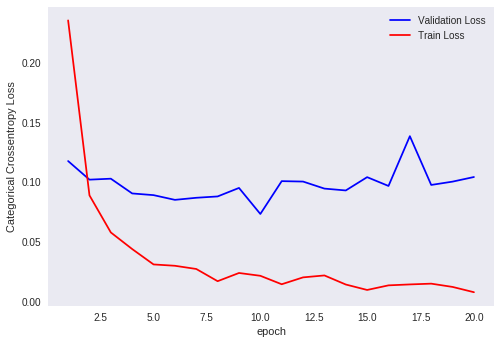

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 #### Observations
    1. With, 3 hidden layers, the accuracy is good and is the least at 2 epochs.
    2. The accuracy is around 97.9%.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


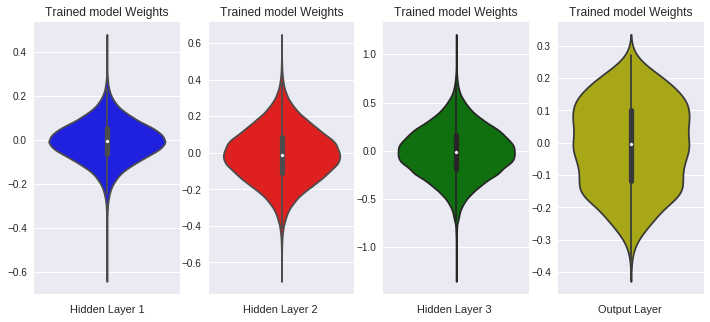

In [43]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 0.
    3. The weights of hidden layer 2 are centered around 0.
    4. The weights of output layer deviate towards 0.

### MLP+ReLU+Adam+BN

In [44]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                2570      
Total para

#### Testing with Test Data

Test score: 0.09175229433832265
Test accuracy: 0.9803


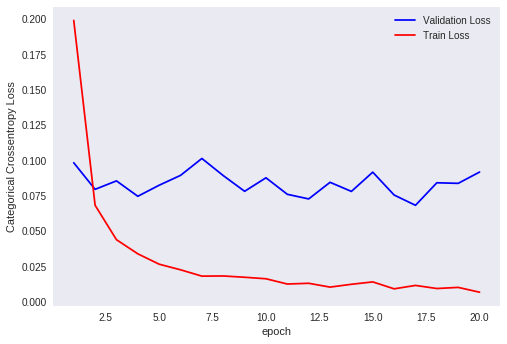

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 hidden layers, the accuracy is good and is the least at 2 epochs.
    2. The accuracy is around 98.03%.
    3. We've used batch normalisation here.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


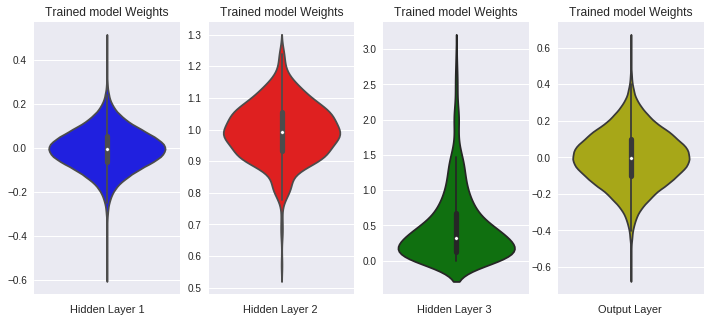

In [45]:

w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 1.
    3. The weights of hidden layer 3 are centered around 0.1.
    4. The weights of output layer deviate towards 0.

### MLP+ReLU+Adam+Dropout

In [46]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.124, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total para

#### Testing with Test Data

Test score: 0.08271553118186056
Test accuracy: 0.9795


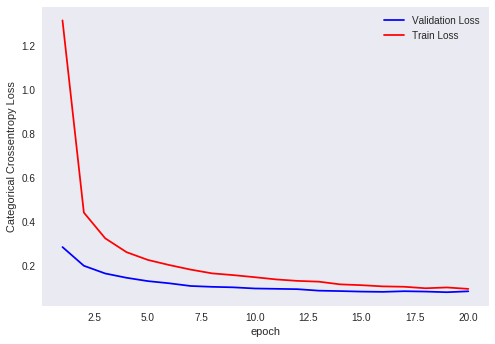

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 hidden layers, the accuracy is good and is the least at 20 epochs.
    2. The accuracy is around 97.9%.
    3. We've used dropout here.
    4. The loss also reduced significantly with it.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


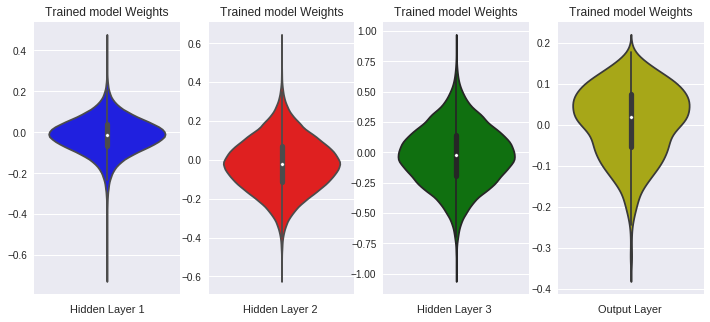

In [47]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 0.
    3. The weights of hidden layer 3 are centered around 0.1
    4. The weights of output layer deviate towards 0.1

### MLP+ReLU+Adam+BN+Dropout

In [48]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.124, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
__________

#### Testing with Test Data

Test score: 0.06420910110869445
Test accuracy: 0.9812


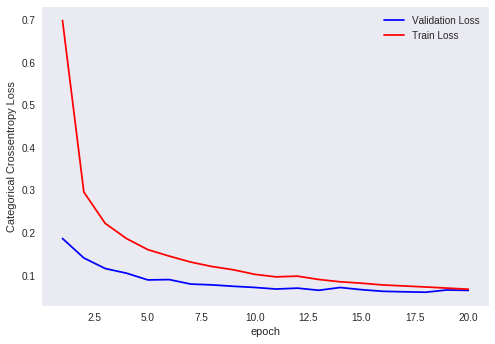

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 3 hidden layers, the accuracy is good and is the least at 2 epochs.
    2. The accuracy is around 98.03%.
    3. We've used Batch Normalisation and Dropout here.
    4. The loss also reduced significantly with it.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


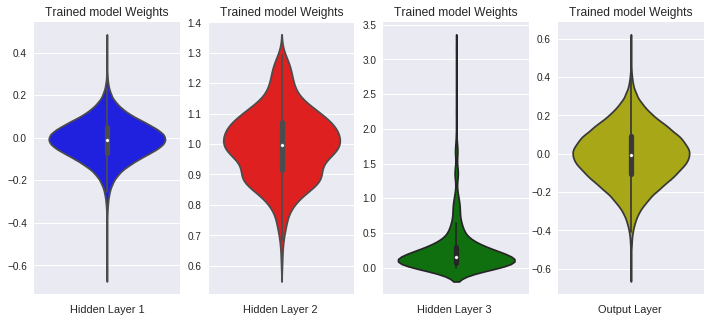

In [49]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 1.
    3. The weights of hidden layer 3 are centered around 0.0.
    4. The weights of output layer deviate towards 0.

### Summary

In [0]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()

x.field_names = ["Model","Activation", "Number of layers","Optimizer", " Optimization Features", "Test score","Test accuracy"]

x.add_row(["MLP","ReLU",3,"AdAM","None",0.10,0.97])
x.add_row(["MLP","ReLU",3,"AdAM","BN",0.09,0.98])
x.add_row(["MLP","ReLU",3,"AdAM","Drop out",0.08,0.97])
x.add_row(["MLP","ReLU",3,"AdAM","BN & Dropout",0.064,0.98])


print(x)

+-------+------------+------------------+-----------+------------------------+------------+---------------+
| Model | Activation | Number of layers | Optimizer |  Optimization Features | Test score | Test accuracy |
+-------+------------+------------------+-----------+------------------------+------------+---------------+
|  MLP  |    ReLU    |        3         |    AdAM   |          None          |    0.1     |      0.97     |
|  MLP  |    ReLU    |        3         |    AdAM   |           BN           |    0.09    |      0.98     |
|  MLP  |    ReLU    |        3         |    AdAM   |        Drop out        |    0.08    |      0.97     |
|  MLP  |    ReLU    |        3         |    AdAM   |      BN & Dropout      |   0.064    |      0.98     |
+-------+------------+------------------+-----------+------------------------+------------+---------------+


# ****MLP(Hidden layers=5)****


### MLP+Relu+Adam

In [26]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.124, seed=None)) )

model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )

model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.400, seed=None)) )

model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.900, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________
None

#### Testing with Test Data

Test score: 0.11763187140065566
Test accuracy: 0.9769


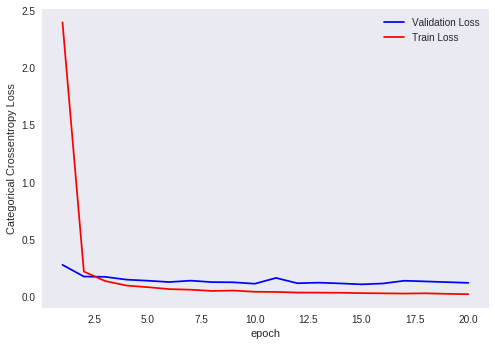

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 hidden layers, the accuracy is good and is the least at 2 epochs.
    2. The accuracy is around 97.69%.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


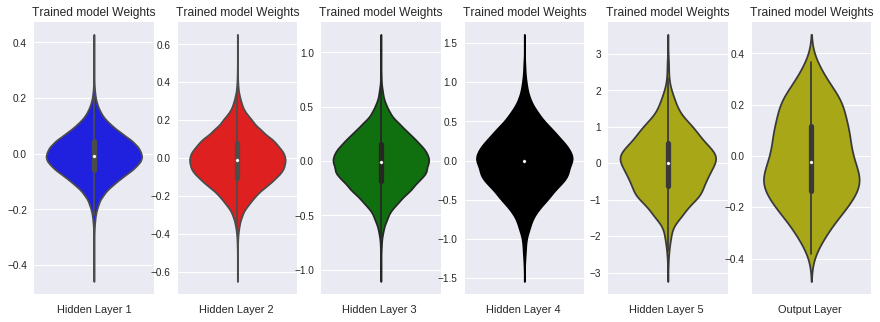

In [32]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='0')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 0.
    3. The weights of hidden layer 3 are centered around 0.
    4. The weights of hidden layer 4 are centered around 0.
    5. The weights of hidden layer 5 are centered around 0.
    6. The weights of output layer deviate towards 0.

### MLP+ReLU+Adam+BN

In [33]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.124, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.400, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.900, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
__________

#### Testing with Test Data

Test score: 0.07079206678348855
Test accuracy: 0.9819


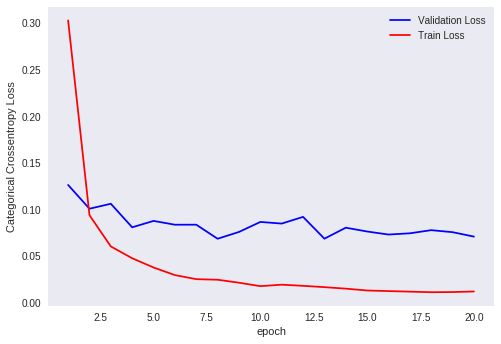

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 hidden layers, the accuracy is good and is the least at 2 epochs.
    2. The accuracy is around 98.19%.
    3. We've used Batch Normalisation here.
    4. The loss also reduced significantly with it.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


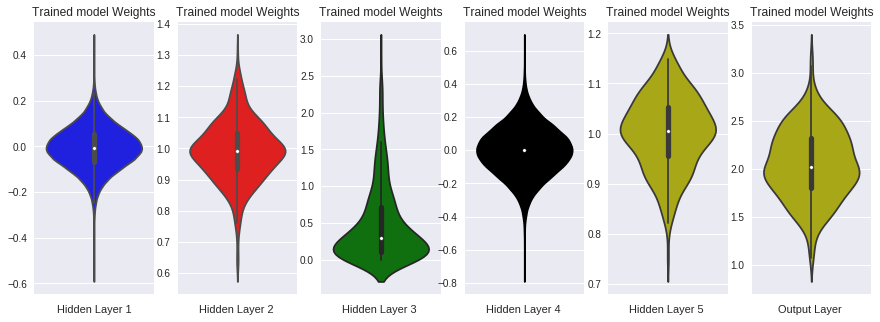

In [34]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='0')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 1.0.
    3. The weights of hidden layer 3 are centered around 0.1
    4. The weights of hidden layer 4 are centered around 0.
    5. The weights of hidden layer 5 are centered around 1 
    6. The weights of output layer deviate towards 2.0

### MLP+ReLU+Adam+Dropout

In [35]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.2))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.124, seed=None)) )
model_relu.add(Dropout(0.2))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu.add(Dropout(0.2))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.400, seed=None)) )
model_relu.add(Dropout(0.2))
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.900, seed=None)) )
model_relu.add(Dropout(0.2))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
__________

#### Testing with Test Data

Test score: 0.11339752997740671
Test accuracy: 0.9751


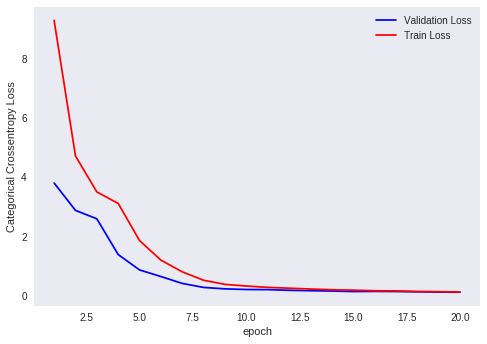

In [36]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 hidden layers, the accuracy is good.
    2. The accuracy is around 97.
    3. We've used Dropout here.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


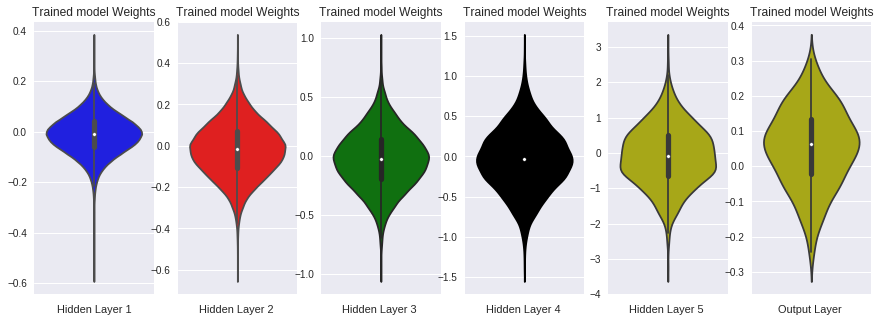

In [37]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='0')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 0.
    3. The weights of hidden layer 3 are centered around 0.
    4. The weights of hidden layer 3 are centered around 0.
    5. The weights of hidden layer 3 are centered around 0.
    6. The weights of output layer deviate towards 0.

### MLP+ReLU+Adam+BN+Dropout

In [38]:
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.124, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.400, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.900, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
__________

#### Testing with Test Data

Test score: 0.09634592586611397
Test accuracy: 0.9801


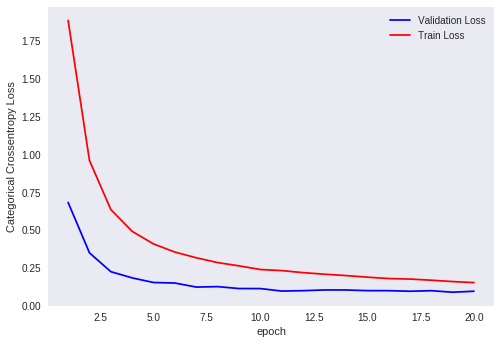

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observations
    1. With, 5 hidden layers, the accuracy is good and is the least at 2 epochs.
    2. The accuracy is around 98.03%.
    3. We've used Batch Normalisation here.
    4. The loss also reduced significantly with it.

#### Violin Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


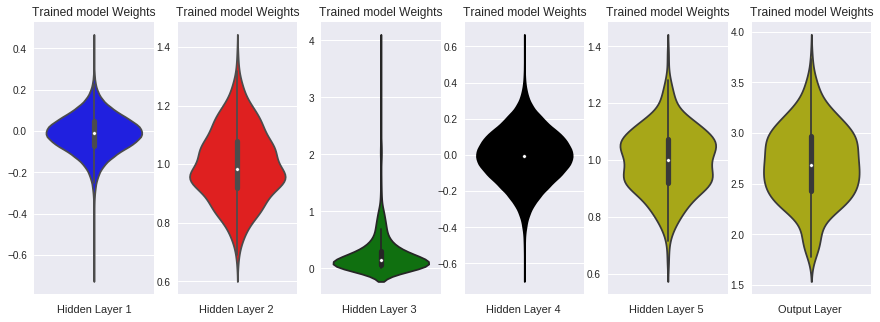

In [39]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='0')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observations
    1. The weights of hidden layer 1 are mostly centered around 0.
    2. The weights of hidden layer 2 are centered around 1.0.
    3. The weights of hidden layer 3 are centered around 0.1.
    4. The weights of hidden layer 3 are centered around 0.
    5. The weights of hidden layer 3 are centered around 1.0.
    6. The weights of output layer deviate towards 2.5.

### Summary

In [40]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()

x.field_names = ["Model","Activation", "Number of layers","Optimizer", " Optimization Features", "Test score","Test accuracy"]

x.add_row(["MLP","ReLU",5,"AdAM","None",0.11,0.97])
x.add_row(["MLP","ReLU",5,"AdAM","BN",0.11,0.97])
x.add_row(["MLP","ReLU",5,"AdAM","Drop out",0.07,0.98])
x.add_row(["MLP","ReLU",5,"AdAM","BN & Dropout",0.096,0.98])


print(x)

+-------+------------+------------------+-----------+------------------------+------------+---------------+
| Model | Activation | Number of layers | Optimizer |  Optimization Features | Test score | Test accuracy |
+-------+------------+------------------+-----------+------------------------+------------+---------------+
|  MLP  |    ReLU    |        5         |    AdAM   |          None          |    0.11    |      0.97     |
|  MLP  |    ReLU    |        5         |    AdAM   |           BN           |    0.11    |      0.97     |
|  MLP  |    ReLU    |        5         |    AdAM   |        Drop out        |    0.07    |      0.98     |
|  MLP  |    ReLU    |        5         |    AdAM   |      BN & Dropout      |   0.096    |      0.98     |
+-------+------------+------------------+-----------+------------------------+------------+---------------+


## Final Observations
    1. We've tried out various architectures on MNIST dataset.
    2. We've used google colaboratory which has significatnly fastened the computation time
    3. We find that as number of hidden layers increase, the model tends to overfit
    4. The optimal number of hidden layers are 3.
    5. We've used ReLU activation for all our models
    6. In optimization, We've used Batch normalisation and dropouts.
    7. The significantly improved with Batch normalisation and dropout.